## Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/data1.csv")
df.head()

,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802



## Plot of ISE vs Date

In [ ]:
df.date = pd.to_datetime(df.date, dayfirst = True)

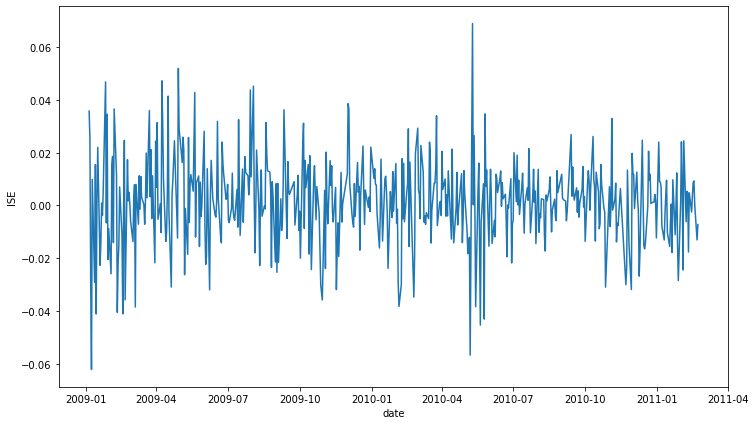

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(x='date',y='ISE',data=df)
plt.show()

## Transforming the data

In [ ]:
df.drop(columns=['SP','ISE.1','DAX','FTSE','NIKKEI','BOVESPA','EU','EM'],inplace=True)
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')
df.head()

,ISE
date,
2009-01-05,0.035754
2009-01-06,0.025426
2009-01-07,-0.028862
2009-01-08,-0.062208
2009-01-09,0.009860


In [ ]:
df.describe()

,ISE
count,557.000000
mean,0.001611
std,0.016220
min,-0.062208
25%,-0.006520
50%,0.002217
75%,0.010203
max,0.068952


## We see that the mean is 0, standard deviation is 0.016
## --------------------------------------------------------------------------------
## Taking the last 50 days of the dataset to check for trend and stationarity


In [ ]:
df1 = df[len(df)-51:]
df2 = df1.copy()
df1.head()

,ISE
date,
2010-12-14,0.001946
2010-12-15,-0.015310
2010-12-16,-0.016467
2010-12-17,-0.014151
2010-12-20,-0.000356


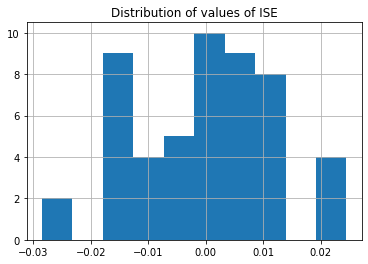

In [ ]:
df1.hist()
plt.title("Distribution of values of ISE")
plt.show()

### The Histogram shows that the distribution of values in ISE doesn't follow any distribution
-------------------------------------------------------------------------------
### To see if the time series has constant variance we split the data and check for the mean and variance

In [ ]:
a = round(len(df1)/2)
data1 = df1[:a]
data2 = df1[a:]
print('Mean of first half of data: %f'%data1.mean())
print('Mean of second half of data: %f'%data2.mean())
print('Variance of first half of data: %f'%data1.var())
print('Variance of second half of data: %f'%data2.var())

Mean of first half of data: 0.000028
Mean of second half of data: -0.001080
Variance of first half of data: 0.000122
Variance of second half of data: 0.000181


### It is seen that both the mean and the variance is constant among the 2 halves of data

### **Autocorrelation Plot**

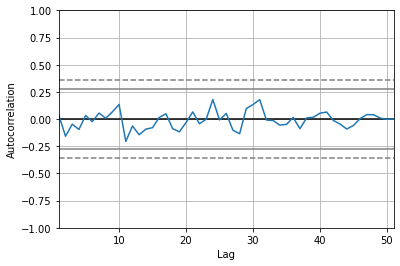

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1.ISE)

### Clearly all the autocorrelation values are close to zero proving the time series is random and there is no autocorrelation between values

## **Seasonality**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

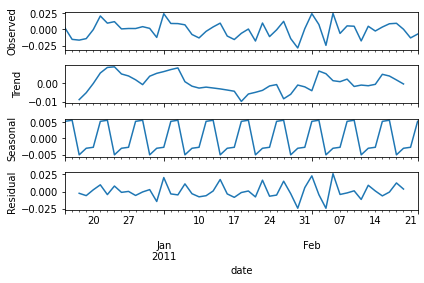

In [ ]:
s_dec_additive = seasonal_decompose(x=df1.ISE,model='additive')
s_dec_additive.plot()
plt.show()

### Seasonal graph

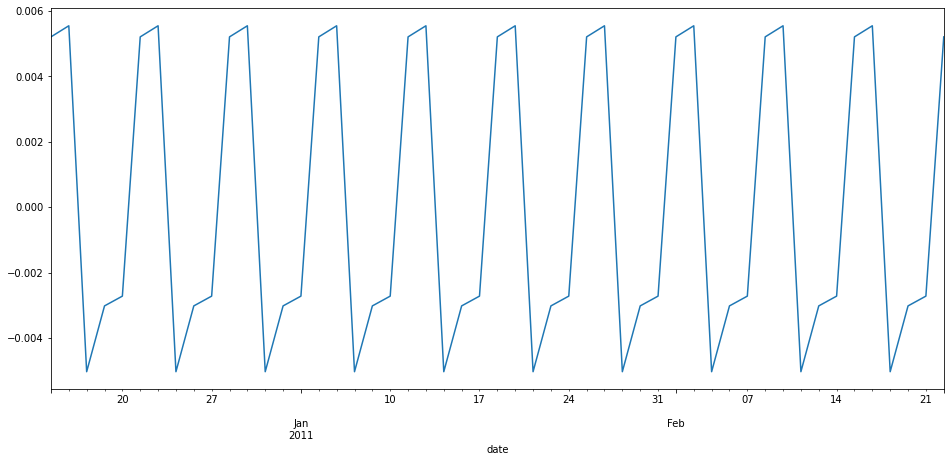

In [ ]:
s_dec_additive.seasonal.plot(figsize=(16,7))

### Here from the above graphs we can see that:

### 1.   The trend does not resemble the observed graph and has no clear positive or negative incline but there are several parts of both inclines.
### 2.   The sequence has seasonality and the pattern is repeated after 7days
### 3.   Residual also has no fixed pattern and is random




In [ ]:
from statsmodels.tsa.stattools import adfuller

## **Ad Fuller to check for Stationarity**

In [ ]:
def ad_fuller_test(sales):
  results = adfuller(sales)
  labels = ['Test Statistic','p-value','Number of lags used','Number of Observations','Critical Value']
  for values, labels in zip(results,labels):
    print(labels,' : ',str(values))

In [ ]:
ad_fuller_test(df1['ISE'])

Test Statistic  :  -5.548980726405822
p-value  :  1.6361529686112986e-06
Number of lags used  :  1
Number of Observations  :  49
Critical Value  :  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}


### As p<0.05, hence the null hypothesis is rejected, the data is stationary
1.   Test statistic is less than all of 1%, 2%, 10% critical values 
2.   p-value is close to 0
3.   Lags used is 1
4.   The time series is stationary 



## **ACF Plot**
### Plotting the graph from 1st lag as for the 0th lag, correlation between and itself will be 1

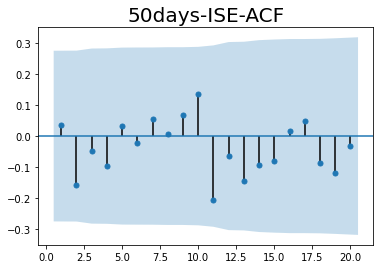

In [ ]:
sm.graphics.tsa.plot_acf(df1.ISE,lags=20,zero=False)
plt.title('50days-ISE-ACF',size=20)
plt.show()

### All the lines fall within the blue area of significance, suggesting that the coefficients are not significant, hence there is no autocorrelation between lags

## **PACF Plot**
### Again,plotting the graph from 1st lag as for the 0th lag, correlation between and itself will be 1

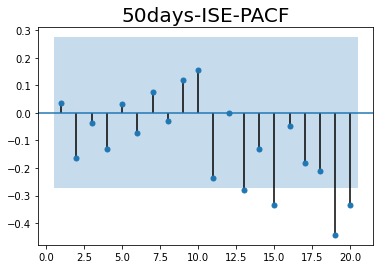

In [ ]:
sm.graphics.tsa.plot_pacf(df1.ISE,lags=20,zero=False)
plt.title('50days-ISE-PACF',size=20)
plt.show()

### The PACF values are significant towards the higher lags

### ---------------------------------------------------------------------------

## **Train-Test Split**

In [ ]:
n = len(df1)
p = round(n*0.80)
train_data = df1.iloc[:p]
test_data = df1.iloc[p:]
print(len(train_data),len(test_data))

41 10


In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 11.6 MB/s 
     |████████████████████████████████| 9.5 MB 49.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima
best_fit = auto_arima(df1['ISE'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-296.085, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-301.977, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-300.042, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-300.071, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-303.884, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-298.911, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.825 seconds


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## As there is seasonality in the time series, shown above, we use SARIMA (Seasonal Arima) instead of Arima to get better results

## SARIMAX (0,0,0)[0,0,0,7]

In [ ]:
model=sm.tsa.statespace.SARIMAX(df1['ISE'],order=(0, 0, 0),seasonal_order=(0,0,0,7))
ISE_model=model.fit()
ISE_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                    ISE   No. Observations:                   51
Model:                        SARIMAX   Log Likelihood                 152.942
Date:                Tue, 03 Aug 2021   AIC                           -303.884
Time:                        12:32:54   BIC                           -301.952
Sample:                    12-14-2010   HQIC                          -303.146
                         - 02-22-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   3.13e-05      4.653      0.000    8.42e-05       0.000
===================================================================================
Ljung-Box (Q):                       30.12   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.87   Prob(JB):                         0.90
Heteroskedasticity (H):               1.17   Skew:                            -0.04
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df1['ISE_sarimax1']=ISE_model.predict(start=len(train_data),end=556,dynamic=True)

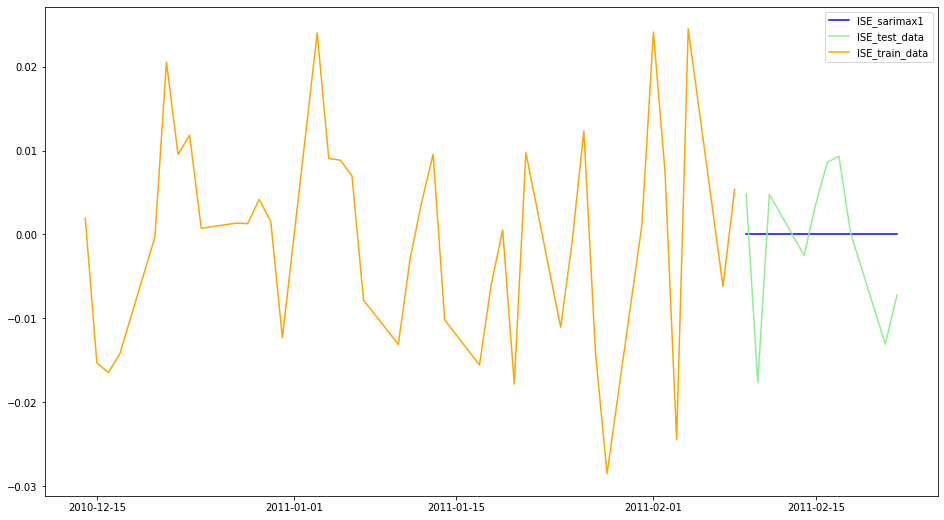

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(df1['ISE_sarimax1'],color='blue')
plt.plot(test_data['ISE'],color='lightgreen')
plt.plot(train_data['ISE'],color='orange')
plt.legend(['ISE_sarimax1','ISE_test_data','ISE_train_data'])

## The prediction was not satisfactory so we use differencing to get better results

# Trying differencing to get better results

In [ ]:
df1['ISE_diff'] = df1['ISE'].diff()
df1.drop(columns=['ISE_sarimax1'],inplace=True)
df1 = df1.drop(df1.index[0])
df1.head()

,ISE,ISE_diff
date,,
2010-12-15,-0.015310,-0.017256
2010-12-16,-0.016467,-0.001157
2010-12-17,-0.014151,0.002316
2010-12-20,-0.000356,0.013795
2010-12-21,0.020544,0.020900


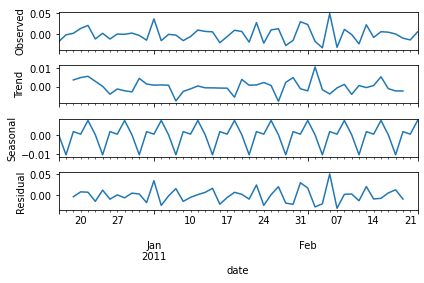

In [ ]:
s_dec_additive1 = seasonal_decompose(x=df1.ISE_diff,model='additive')
s_dec_additive1.plot()
plt.show()

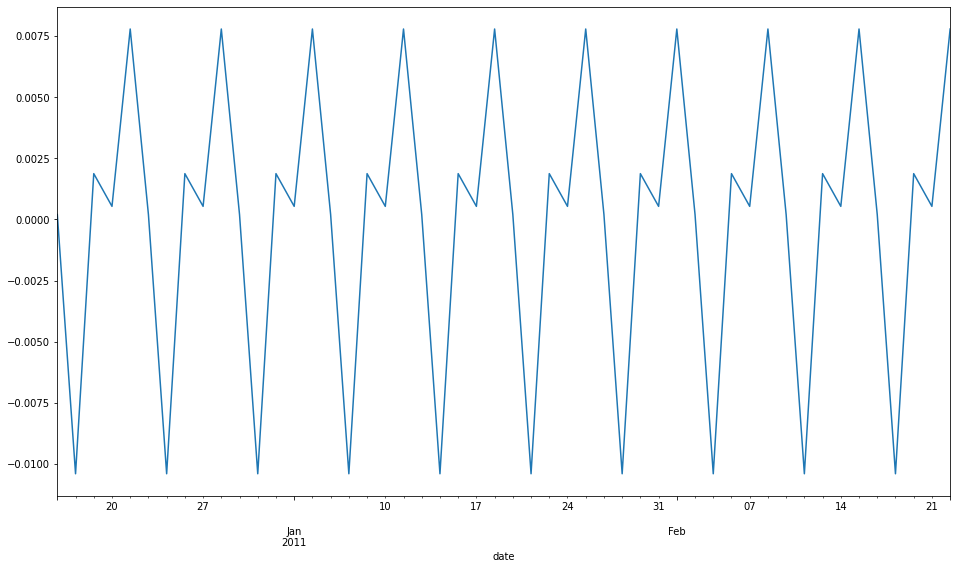

In [ ]:
s_dec_additive1.seasonal.plot(figsize=(16,9))

In [ ]:
ad_fuller_test(df1['ISE_diff'])

Test Statistic  :  -6.027215708959613
p-value  :  1.4463061254434532e-07
Number of lags used  :  3
Number of Observations  :  46
Critical Value  :  {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}


## The time series is still stationary after differencing

## **ACF Plot 2**
### Plotting the graph from 1st lag as for the 0th lag, correlation between and itself will be 1

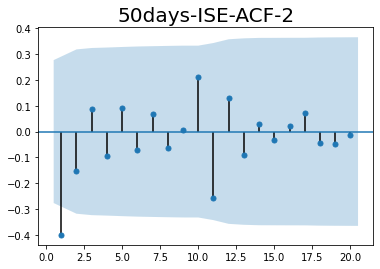

In [ ]:
sm.graphics.tsa.plot_acf(df1.ISE_diff,lags=20,zero=False)
plt.title('50days-ISE-ACF-2',size=20)
plt.show()

## Here the 1st lag is significant

## **PACF Plot 2**
### Again,plotting the graph from 1st lag as for the 0th lag, correlation between and itself will be 1

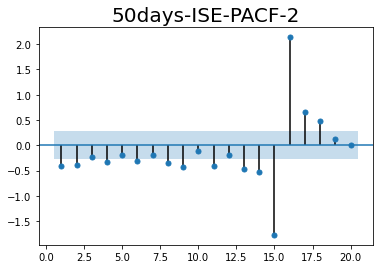

In [ ]:
sm.graphics.tsa.plot_pacf(df1.ISE_diff,lags=20,zero=False)
plt.title('50days-ISE-PACF-2',size=20)
plt.show()

## Here a lot of lags are significant so we need auto-arima to get the best model

In [ ]:
best_fit_2 = auto_arima(df1.ISE_diff,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-283.734, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-262.350, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-269.153, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-264.344, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-285.621, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-284.585, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-283.097, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-284.841, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-286.227, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-274.810, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-282.519, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-275.224, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-

In [ ]:
model_1=sm.tsa.statespace.SARIMAX(df1.ISE_diff,order=(2, 0, 1),seasonal_order=(2,0,1,7))
ISE_model_2=model_1.fit()
ISE_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                          ISE_diff   No. Observations:                   50
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 7)   Log Likelihood                 147.247
Date:                           Tue, 03 Aug 2021   AIC                           -280.495
Time:                                   12:33:00   BIC                           -267.111
Sample:                               12-15-2010   HQIC                          -275.398
                                    - 02-22-2011                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0365      0.144     -0.253      0.800      -0.319       0.246
ar.L2         -0.2339      0.134     -1.743      0.081      -0.497       0.029
ma.L1         -0.8560      0.178     -4.815      0.000      -1.204      -0.508
ar.S.L7        0.1399      1.114      0.126      0.900      -2.044       2.324
ar.S.L14      -0.2161      0.179     -1.204      0.228      -0.568       0.136
ma.S.L7       -0.0628      1.033     -0.061      0.952      -2.088       1.962
sigma2         0.0001   3.56e-05      4.074      0.000    7.54e-05       0.000
===================================================================================
Ljung-Box (Q):                       29.32   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.89   Prob(JB):                         0.62
Heteroskedasticity (H):               1.10   Skew:                             0.20
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df1['ISE_sarimax2']=ISE_model_2.predict(start=len(train_data),end=556,dynamic=True)

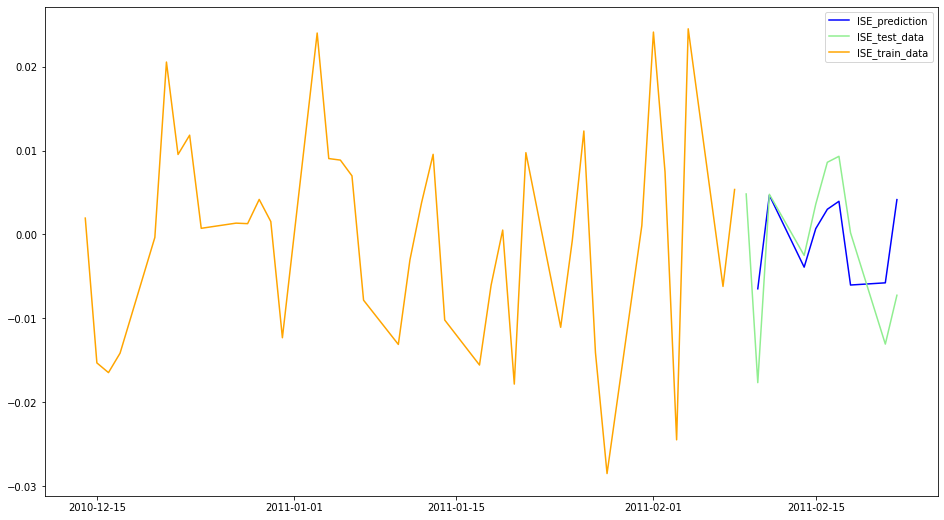

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(df1['ISE_sarimax2'],color='blue')
plt.plot(test_data['ISE'],color='lightgreen')                                                          
plt.plot(train_data['ISE'],color='orange')
plt.legend(['ISE_prediction','ISE_test_data','ISE_train_data'])

# This model gave better results as shown in the graph